Brain Tumour Classification

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [2]:
dataset_path = "./Dataset"  
train_dir = os.path.join(dataset_path, "Training")
test_dir = os.path.join(dataset_path, "Testing")

In [5]:
categories = ["glioma", "meningioma", "notumor", "pituitary"]

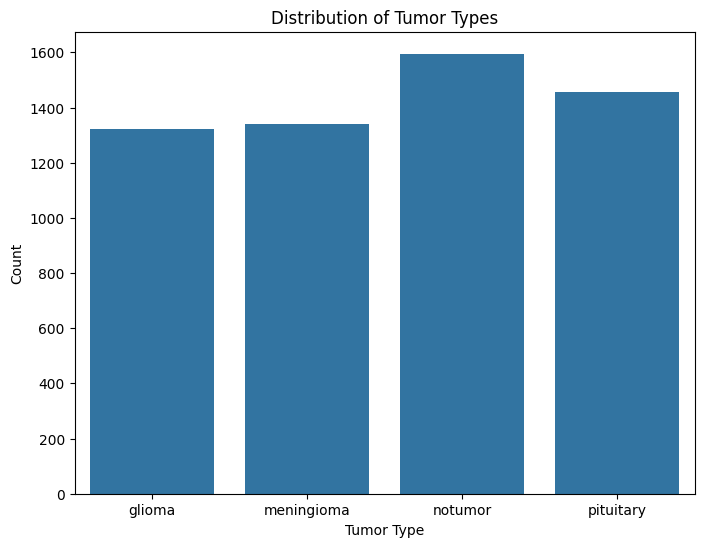

In [6]:

train_data = []
for category in categories:
    folder_path = os.path.join(train_dir, category)
    images = os.listdir(folder_path)
    count = len(images)
    train_data.append(pd.DataFrame({"Image": images, "Category": [category] * count, "Count": [count] * count}))

train_df = pd.concat(train_data, ignore_index=True)


plt.figure(figsize=(8, 6))
sns.barplot(data=train_df, x="Category", y="Count")
plt.title("Distribution of Tumor Types")
plt.xlabel("Tumor Type")
plt.ylabel("Count")
plt.show()


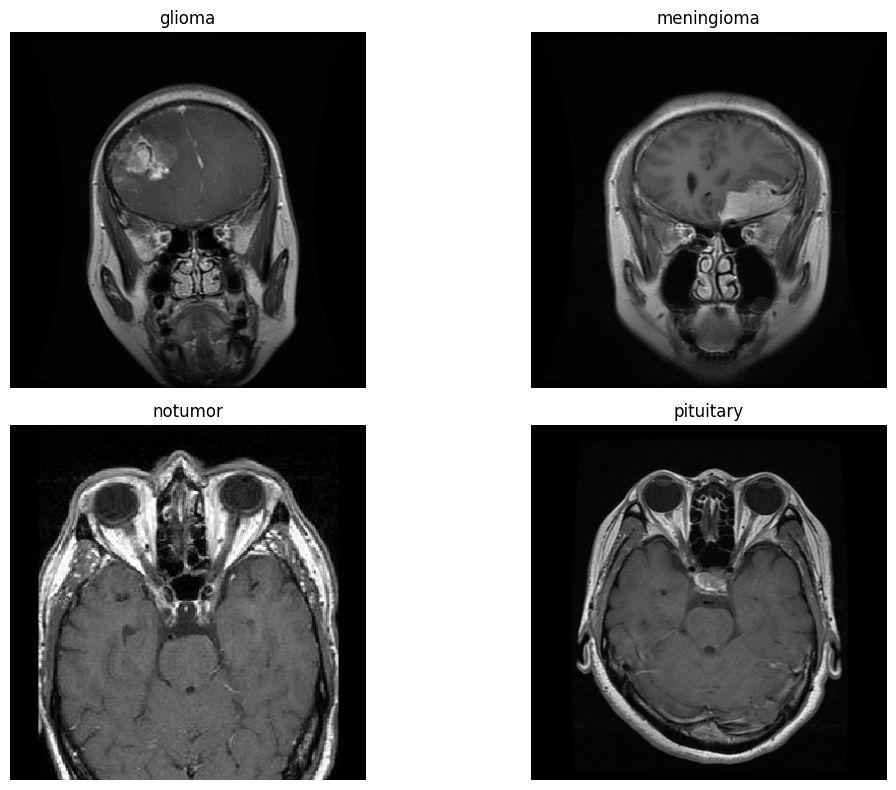

In [7]:

plt.figure(figsize=(12, 8))
for i, category in enumerate(categories):
    folder_path = os.path.join(train_dir, category)
    image_path = os.path.join(folder_path, os.listdir(folder_path)[0]) 
    img = plt.imread(image_path)
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(category)
    plt.axis("off")
plt.tight_layout()
plt.show()


In [8]:

image_size = (150, 150)

batch_size = 32

epochs = 50


In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical"
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(len(categories), activation="softmax")
])


model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

c:\Users\Sanoja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)


c:\Users\Sanoja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 126s 695ms/step - accuracy: 0.4557 - loss: 1.1430 - val_accuracy: 0.4328 - val_loss: 2.0555
Epoch 2/50
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:13 752ms/step - accuracy: 0.6562 - loss: 0.8082

c:\Users\Sanoja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


178/178 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.6562 - loss: 0.8082 - val_accuracy: 0.5117 - val_loss: 1.5162
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 95s 530ms/step - accuracy: 0.6966 - loss: 0.7622 - val_accuracy: 0.4844 - val_loss: 1.5844
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.7500 - loss: 0.5997 - val_accuracy: 0.5437 - val_loss: 1.2586
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 72s 403ms/step - accuracy: 0.7328 - loss: 0.6738 - val_accuracy: 0.5625 - val_loss: 1.2539
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.8125 - loss: 0.5838 - val_accuracy: 0.5805 - val_loss: 1.2073
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 74s 417ms/step - accuracy: 0.7926 - loss: 0.5618 - val_accuracy: 0.6117 - val_loss: 1.1369
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.7812 - loss: 0.6124 - val_accuracy: 0.6305 - val_loss: 1.0548
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 93s 525ms/step - accuracy: 0.7920 - loss: 0.5354 - val_accura

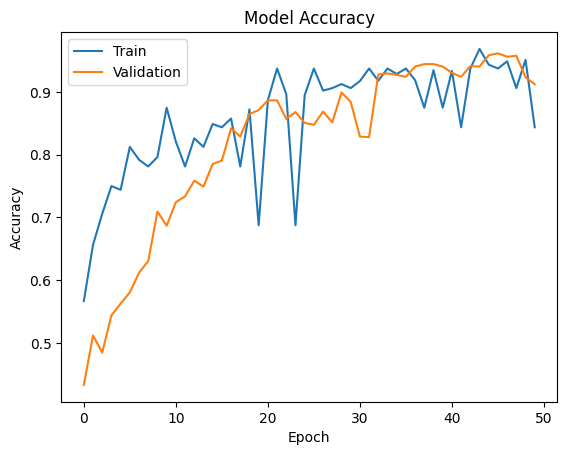

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()


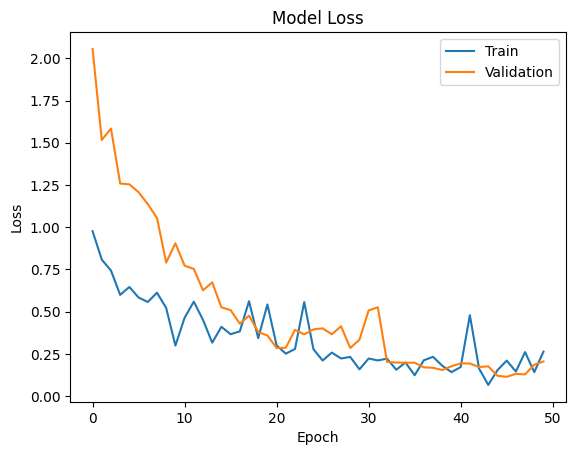

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [14]:
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 169ms/step - accuracy: 0.8595 - loss: 0.3060
Test Loss: 0.20551657676696777
Test Accuracy: 0.9125000238418579


In [15]:
predictions = model.predict(test_generator)
predicted_categories = np.argmax(predictions, axis=1)
true_categories = test_generator.classes

41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 160ms/step


In [20]:
print(predicted_categories)

[0 0 0 ... 3 3 3]


In [16]:
confusion_matrix = tf.math.confusion_matrix(true_categories, predicted_categories)

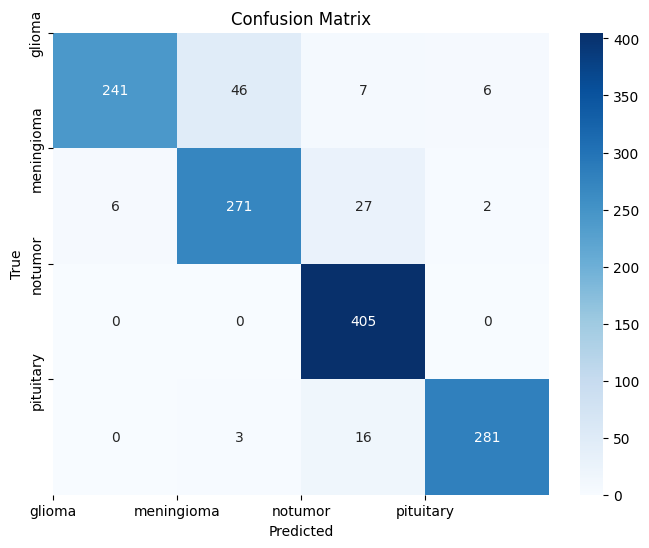

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(len(categories)), labels=categories)
plt.yticks(ticks=np.arange(len(categories)), labels=categories)
plt.show()


In [18]:
model.save("brain_tumor_detection_model.h5")

41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 159ms/step


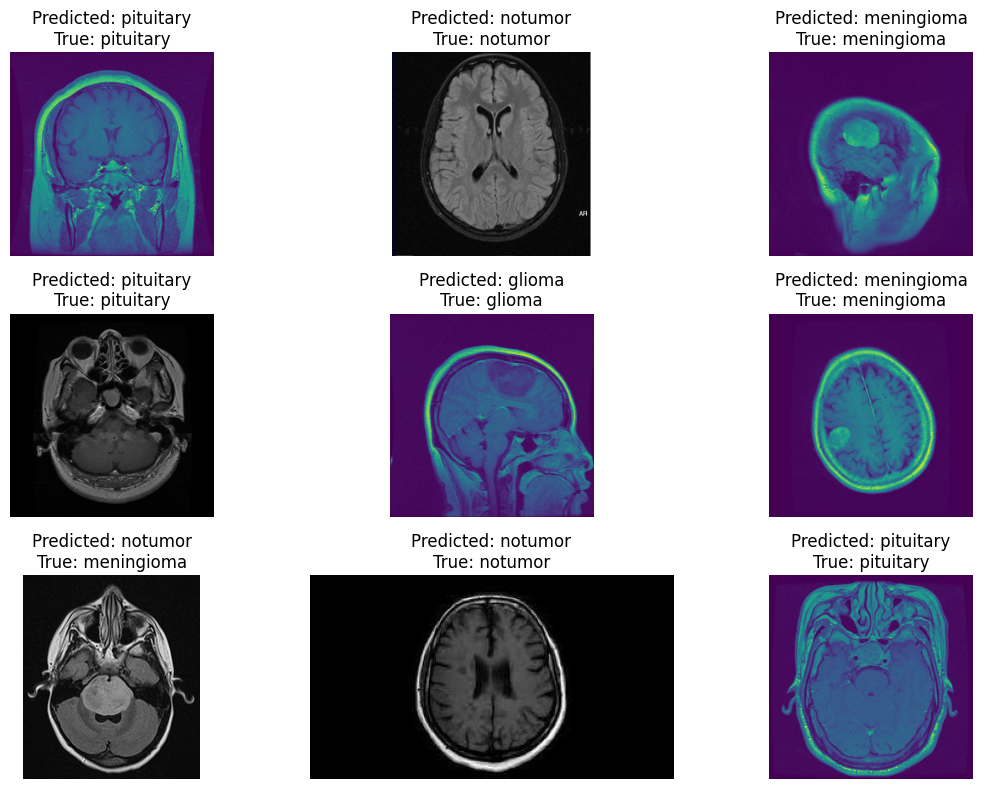

In [21]:
predictions = model.predict(test_generator)
predicted_categories = np.argmax(predictions, axis=1)
true_categories = test_generator.classes

test_images = test_generator.filenames
sample_indices = np.random.choice(range(len(test_images)), size=9, replace=False)
sample_images = [test_images[i] for i in sample_indices]
sample_predictions = [categories[predicted_categories[i]] for i in sample_indices]
sample_true_labels = [categories[true_categories[i]] for i in sample_indices]


plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(test_dir, sample_images[i]))  
    plt.imshow(img)
    plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()